In [1]:
import yfinance as yahooFinance
import pandas as pd
 
GetFacebookInformation = yahooFinance.Ticker("META")
 
pd.set_option('display.max_rows', None)
# Let us  get historical stock prices for Facebook 
# covering the past few years.
# max->maximum number of daily prices available 
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 
# 5y, 10y and ytd.
print(GetFacebookInformation.history(period="max"))


                                 Open        High         Low       Close  \
Date                                                                        
2012-05-18 00:00:00-04:00   42.005431   44.952305   37.959724   38.189480   
2012-05-21 00:00:00-04:00   36.491281   36.621144   32.965024   33.993931   
2012-05-22 00:00:00-04:00   32.575438   33.554399   30.907208   30.967144   
2012-05-23 00:00:00-04:00   31.336752   32.465554   31.326762   31.966084   
2012-05-24 00:00:00-04:00   32.915078   33.174801   31.736328   32.994991   
2012-05-25 00:00:00-04:00   32.865131   32.915077   31.077027   31.876179   
2012-05-29 00:00:00-04:00   31.446634   31.656413   28.619634   28.809433   
2012-05-30 00:00:00-04:00   28.669582   29.518679   27.830472   28.160122   
2012-05-31 00:00:00-04:00   28.519740   29.638554   26.801564   29.568628   
2012-06-01 00:00:00-04:00   28.859378   29.119103   27.360968   27.690619   
2012-06-04 00:00:00-04:00   27.171172   27.620694   26.411977   26.871489   

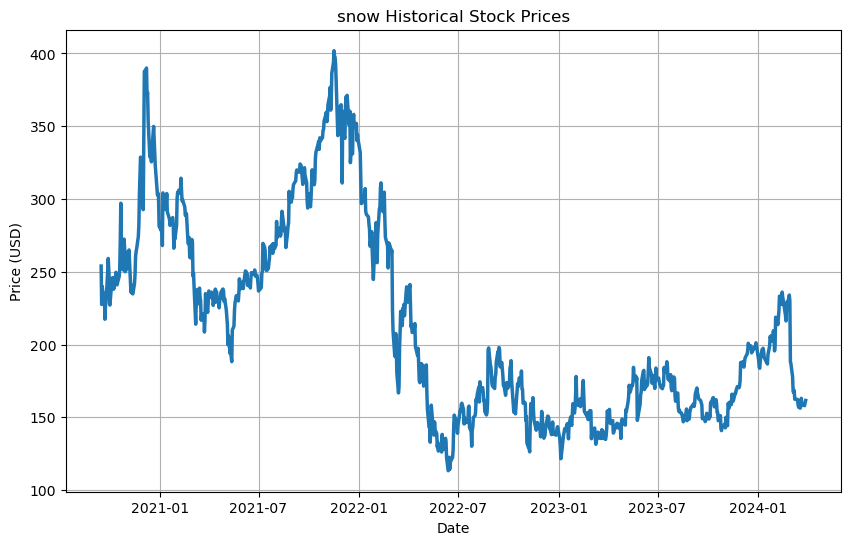

In [22]:
import yfinance as yahooFinance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Ticker object for "META"
ticker = "snow"
stock_data = yahooFinance.Ticker(ticker)

# Fetch historical stock prices
historical_data = stock_data.history(period="max")

# Plot the historical stock prices using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=historical_data['Close'], linewidth=2.5)
plt.title(f'{ticker} Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


In [15]:
import yfinance as yahooFinance
import pandas as pd
from datetime import datetime, timedelta
from newsapi import NewsApiClient

# Set up the News API client
newsapi = NewsApiClient(api_key='d0991d9186da4c259f29b078bd9d7550')  # Replace 'YOUR_API_KEY' with your actual API key

# Function to get news articles related to a company
def get_company_news(company, from_date, to_date, language='en'):
    # Define the search query
    query = f'"{company}"'
    
    # Fetch news articles
    articles = newsapi.get_everything(q=query, from_param=from_date, to=to_date, language=language)
    
    return articles['articles']

# Function to calculate stock price change after a news date
def calculate_price_change(stock_data, news_date):
    # Find the index of the stock data corresponding to the news date
    idx = stock_data.index.get_loc(news_date, method='ffill')
    
    # Get the stock price on the news date
    price_on_news_date = stock_data.iloc[idx]['Close']
    
    # Get the stock price 1 day after the news date
    price_after_news = stock_data.iloc[idx+1]['Close']
    
    # Calculate the price change
    price_change = price_after_news - price_on_news_date
    
    return price_change

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
news_articles = get_company_news(company_ticker, from_date=datetime.now() - timedelta(days=30), to_date=datetime.now())

# Display news articles
for article in news_articles:
    print(article['publishedAt'], article['title'], article['url'])

# Calculate stock price change after each news date
for article in news_articles:
    news_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').date()
    price_change = calculate_price_change(stock_data, news_date)
    print(f'Price change after {news_date}: {price_change}')


2024-03-26T12:30:33Z Meta limits 'political' content recommendations on Instagram and Threads https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_60519049-9e19-489f-970d-0c3f25f40a31
2024-03-19T18:43:11Z Meta is finally rolling out trending topics on Threads https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_fa2e0140-c192-4762-890a-1ee20d102e14
2024-03-21T21:15:27Z Researchers ask Meta to keep CrowdTangle online until after 2024 elections https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_f8ea6f26-c75f-4a18-a9a2-2fb6e7a08138
2024-03-06T15:38:30Z Meta Abandons Hacking Victims, Draining Law Enforcement Resources, Officials Say https://www.wired.com/story/meta-hacked-users-draining-resources/
1970-01-01T00:00:00Z [Removed] https://removed.com
2024-03-28T13:00:36Z MLB's Home Run Derby VR launches on the Meta Quest Store https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_864ca54c-f96f-4029-a886-af8a83f3990b
2024-03-28T13:29:13Z 

TypeError: DatetimeIndex.get_loc() got an unexpected keyword argument 'method'

Latest News Articles:
1. 2024-03-26T12:30:33Z - Meta limits 'political' content recommendations on Instagram and Threads - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_60519049-9e19-489f-970d-0c3f25f40a31
2. 2024-03-28T13:29:13Z - Meta and Google face claims of restricting reproductive health ads and fueling misinformation - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_bc43bc2b-7329-4817-82e8-ca0eda5a9252
3. 2024-03-28T13:00:36Z - MLB's Home Run Derby VR launches on the Meta Quest Store - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_864ca54c-f96f-4029-a886-af8a83f3990b
4. 1970-01-01T00:00:00Z - [Removed] - https://removed.com
5. 1970-01-01T00:00:00Z - [Removed] - https://removed.com
6. 2024-03-27T09:00:00Z - Antiabortion Disinformation Ads Ran Rampant on Facebook and Instagram - https://www.wired.com/story/facebook-instagram-anti-abortion-ads-disinformation/
7. 2024-03-25T16:04:55Z - Apple, Google, and Meta are failing D

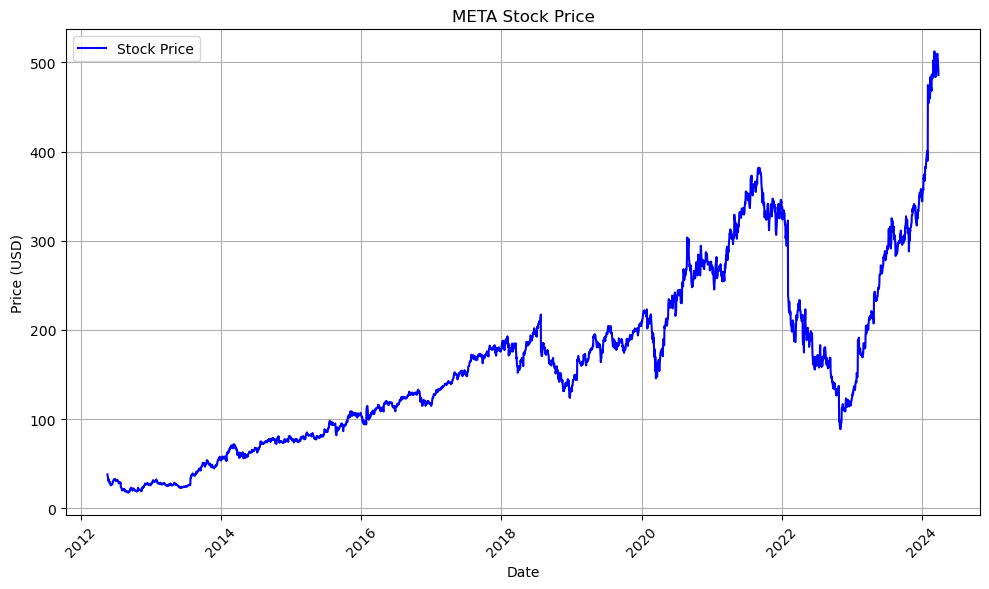

In [25]:
import yfinance as yahooFinance
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from newsapi import NewsApiClient

# Set up the News API client
newsapi = NewsApiClient(api_key='d0991d9186da4c259f29b078bd9d7550')  # Replace 'YOUR_API_KEY' with your actual API key

# Function to get news articles related to a company
def get_company_news(company, from_date, to_date, language='en'):
    # Define the search query
    query = f'"{company}"'
    
    # Fetch news articles
    articles = newsapi.get_everything(q=query, from_param=from_date, to=to_date, language=language)
    
    return articles['articles']

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
news_articles = get_company_news(company_ticker, from_date=datetime.now() - timedelta(days=7), to_date=datetime.now())

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['publishedAt']} - {article['title']} - {article['url']}")

# Plot stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', color='blue')
plt.title(f"{company_ticker} Stock Price")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Latest News Articles:
1. `A grave step backwards`: Meta to scrap misinformation monitoring tool CrowdTangle ahead of 2024 US elections - 3 minutes ago - https://www.wionews.com/trending/a-grave-step-backwards-meta-to-scrap-misinformation-monitoring-tool-crowdtangle-ahead-of-2024-us-elections-706469&ved=2ahUKEwjg3trtx6CFAxUwRmcHHbdrDJ0QxfQBegQICBAC&usg=AOvVaw3jNuFdt0yQoG8StxlsY4gm
2. Force Meta to host news on Facebook and other apps to combat disinformation: Rod Sims - 2 minutes ago - https://www.theaustralian.com.au/business/media/force-meta-to-host-news-to-combat-spread-of-disinformation-rod-sims-says/news-story/18283d24bb7812ba6ee81dca37942076&ved=2ahUKEwjg3trtx6CFAxUwRmcHHbdrDJ0QxfQBegQICRAC&usg=AOvVaw11f-JV6dpNDB7_VpoOlqAz
3. Face Crooks: Meta’s marketplace helps thieves thrive - 1 hour ago - https://www.adelaidenow.com.au/news/south-australia/if-it-looks-too-good-to-be-true-then-it-probably-is-metas-facebook-marketplace-used-to-onsell-stolen-items/news-story/0097a9cc6314280393581

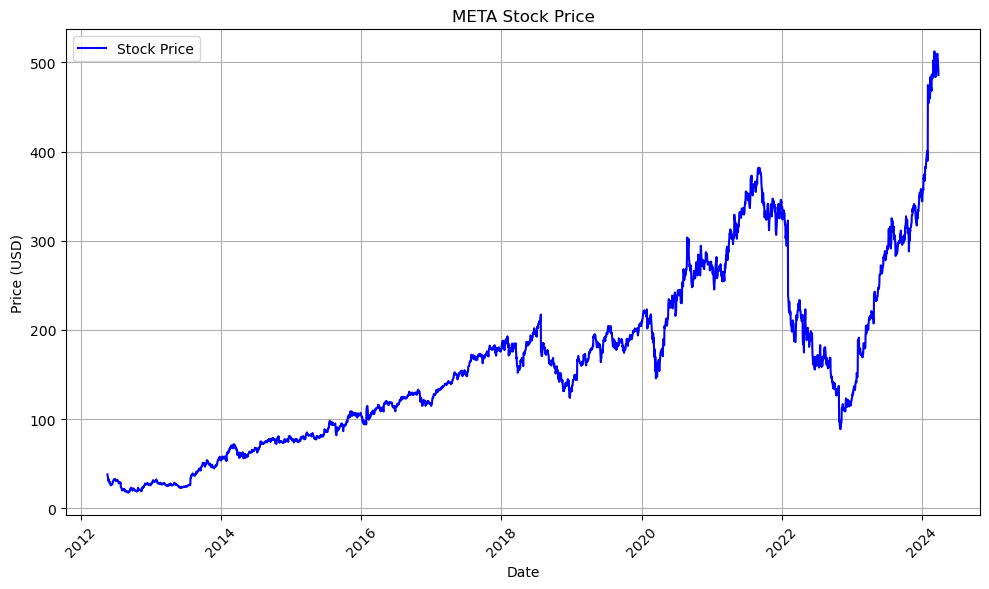

In [26]:
import yfinance as yahooFinance
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from GoogleNews import GoogleNews

# Function to get news articles related to a company
def get_company_news(company, from_date, to_date, language='en'):
    googlenews = GoogleNews(start=from_date, end=to_date)
    googlenews.search(company)
    news_items = googlenews.result()
    return news_items

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
news_articles = get_company_news(company_ticker, from_date=(datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d'), to_date=datetime.now().strftime('%Y-%m-%d'))

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['date']} - {article['link']}")

# Plot stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', color='blue')
plt.title(f"{company_ticker} Stock Price")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
import yfinance as yahooFinance
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from GoogleNews import GoogleNews
from dateutil import parser

# Function to get news articles related to a company
def get_company_news(company, from_date, to_date, language='en'):
    googlenews = GoogleNews(start=from_date, end=to_date)
    googlenews.search(company)
    news_items = googlenews.result()

    # Convert news article dates to days
    for news_item in news_items:
        try:
            news_date = datetime.strptime(news_item['date'], '%b %d, %Y').date()
        except ValueError:
            # Handle news articles with different date formats
            news_date_str = news_item['date'].rsplit(' ', 1)[0]  # Remove the last word (e.g., 'ago')
            news_date = parser.parse(news_date_str, fuzzy=True).date()

        date_str = news_date.strftime('%Y-%m-%d')
        news_item['date'] = date_str

    return news_items

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
three_days_ago = today - timedelta(days=3)
from_date = three_days_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['date']} - {article['link']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    news_date = datetime.strptime(article['date'], '%Y-%m-%d').date()

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x - pd.Timestamp(news_date)))

    # Check if the closest date is before or after the news date
    closest_datetime = closest_date.to_pydatetime().date()
    if closest_datetime < news_date:
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%") see with this code i m trying to get increaed or decrease in stock price after a news is come out about that particular compay its giving me news of today i want news of previous days example new of last week or news or last year and once i get news of that particular date then it will see that particular data in yahoo data and see like how was price on that and it did affected or not

SyntaxError: invalid syntax (1579427340.py, line 71)

In [ ]:
import yfinance as yahooFinance
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from GoogleNews import GoogleNews
from dateutil import parser
from pytz import timezone

# Function to get news articles related to a company
def get_company_news(company, from_date, to_date, language='en'):
    googlenews = GoogleNews(start=from_date, end=to_date)
    googlenews.search(company)
    news_items = googlenews.result()

    # Convert news article dates to days
    for news_item in news_items:
        try:
            news_date = datetime.strptime(news_item['date'], '%b %d, %Y').date()
        except ValueError:
            # Handle news articles with different date formats
            news_date_str = news_item['date'].rsplit(' ', 1)[0]  # Remove the last word (e.g., 'ago')
            news_date = parser.parse(news_date_str, fuzzy=True).date()

        date_str = news_date.strftime('%Y-%m-%d')
        news_item['date'] = date_str

    return news_items

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['date']} - {article['link']}")
import yfinance as yahooFinance
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from GoogleNews import GoogleNews
from dateutil import parser
from pytz import timezone

# Function to get news articles related to a company
def get_company_news(company, from_date, to_date, language='en'):
    googlenews = GoogleNews(start=from_date, end=to_date)
    googlenews.search(company)
    news_items = googlenews.result()

    # Convert news article dates to days
    for news_item in news_items:
        try:
            news_date = datetime.strptime(news_item['date'], '%b %d, %Y').date()
        except ValueError:
            # Handle news articles with different date formats
            news_date_str = news_item['date'].rsplit(' ', 1)[0]  # Remove the last word (e.g., 'ago')
            news_date = parser.parse(news_date_str, fuzzy=True).date()

        date_str = news_date.strftime('%Y-%m-%d')
        news_item['date'] = date_str

    return news_items

# Get historical stock prices
company_ticker = "AA"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['date']} - {article['link']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    news_date = datetime.strptime(article['date'], '%Y-%m-%d').date()

    # Your timezone, for example 'US/Eastern'
    tz = timezone('US/Eastern')

    # Make news_date timezone-aware
    news_date = datetime.strptime(article['date'], '%Y-%m-%d').replace(tzinfo=tz).date()

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x - pd.Timestamp(news_date, tz=tz)))


    # Check if the closest date is before or after the news date
    closest_datetime = closest_date.to_pydatetime().date()
    if closest_datetime < news_date:
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

        
    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%")



Latest News Articles:
1. Facebook-Parent Meta Allegedly Allowed Netflix Access To Users' Private Messages, Antitrust Lawsuit Claims - 2024-04-02 - https://news.abplive.com/technology/facebook-meta-netflix-user-private-messages-antitrust-lawsuit-claim-1676831&ved=2ahUKEwjfnLDFzKOFAxVUTWwGHZzjBdkQxfQBegQIAxAC&usg=AOvVaw1SppkW4LASsc5n1C9ozTDb
2. Inappropriate study inclusion in meta-analysis of sham-controlled rTMS for treatment-resistant depression - BMC ... - 2024-04-02 - https://bmcpsychiatry.biomedcentral.com/articles/10.1186/s12888-024-05703-5&ved=2ahUKEwjfnLDFzKOFAxVUTWwGHZzjBdkQxfQBegQICRAC&usg=AOvVaw2dzqB8VMvRw9nCwYiCS--P
3. Meta purged over 18 mn pieces of bad content on FB, Insta in India in February - 2024-04-02 - https://www.daijiworld.com/index.php/news/newsDisplay%3FnewsID%3D1180474&ved=2ahUKEwjfnLDFzKOFAxVUTWwGHZzjBdkQxfQBegQIABAC&usg=AOvVaw21Q_BUf88-euHvl6CNxZNq
4. Meta Joins Hand With Mukesh Ambani's Reliance To Set Up Firm's First Data Center In India - 2024-04-02 - http

In [21]:
import yfinance as yahooFinance
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from GoogleNews import GoogleNews
from dateutil import parser
from pytz import timezone

# Function to get news articles related to a company
def get_company_news(company, from_date, to_date, language='en'):
    googlenews = GoogleNews(start=from_date, end=to_date)
    googlenews.search(company)
    news_items = googlenews.result()

    # Convert news article dates to days
    for news_item in news_items:
        try:
            news_date = datetime.strptime(news_item['date'], '%b %d, %Y').date()
        except ValueError:
            # Handle news articles with different date formats
            news_date_str = news_item['date'].rsplit(' ', 1)[0]  # Remove the last word (e.g., 'ago')
            news_date = parser.parse(news_date_str, fuzzy=True).date()

        date_str = news_date.strftime('%Y-%m-%d')
        news_item['date'] = date_str

    return news_items

# Get historical stock prices
company_ticker = "AA"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['date']} - {article['link']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    news_date = datetime.strptime(article['date'], '%Y-%m-%d').date()

    # Your timezone, for example 'US/Eastern'
    tz = timezone('US/Eastern')

    # Make news_date timezone-aware
    news_date = datetime.strptime(article['date'], '%Y-%m-%d').replace(tzinfo=tz).date()

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x - pd.Timestamp(news_date, tz=tz)))


    # Check if the closest date is before or after the news date
    closest_datetime = closest_date.to_pydatetime().date()
    if closest_datetime < news_date:
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

        
    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%")

Latest News Articles:
1. AA (Alcoa Corp) may reap gains as insiders became active recently – Knox Daily - 2024-04-02 - https://knoxdaily.com/2024/04/02/aa-alcoa-corp-may-reap-gains-as-insiders-became-active-recently/&ved=2ahUKEwilxY6lhaSFAxUeRmcHHQL3DsIQxfQBegQIAhAC&usg=AOvVaw3pYV5eEkOCh9iEYxSL0gOh
2. SHAREHOLDER INVESTIGATION: Halper Sadeh LLC Investigates CHRD, AA, ADTH - 2024-04-02 - https://www.prnewswire.com/news-releases/shareholder-investigation-halper-sadeh-llc-investigates-chrd-aa-adth-302105710.html&ved=2ahUKEwilxY6lhaSFAxUeRmcHHQL3DsIQxfQBegQICRAC&usg=AOvVaw2Zxk-_AVihQnMMzeJecZmd
3. Gachagua visits Juja police chief shot with arrow during Chang'aa raid - 2024-04-02 - https://www.youtube.com/watch%3Fv%3DhfJQmfDFyFU&ved=2ahUKEwilxY6lhaSFAxUeRmcHHQL3DsIQxfQBegQIABAC&usg=AOvVaw3XIPGoztIJNn6umZNBcQ3b
4. Gachagua visits Juja police boss shot with arrow during chang’aa raid - 2024-04-02 - https://ntvkenya.co.ke/news/gachagua-visits-juja-police-boss-shot-with-arrow-during-changaa-ra

In [29]:
import yfinance as yahooFinance
import pandas as pd
from datetime import datetime, timedelta
from newsapi import NewsApiClient

# Function to get news articles related to a company using News API
def get_company_news(company, from_date, to_date, language='en'):
    newsapi = NewsApiClient(api_key='d0991d9186da4c259f29b078bd9d7550')  # Replace 'YOUR_API_KEY' with your actual News API key
    news_articles = newsapi.get_everything(q=company, from_param=from_date, to=to_date, language=language)
    return news_articles['articles']

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['publishedAt']} - {article['url']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    news_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').date()

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x.date() - news_date))

    # Check if the closest date is before or after the news date
    if closest_date.date() < news_date:
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%")


Latest News Articles:
1. Meta limits 'political' content recommendations on Instagram and Threads - 2024-03-26T12:30:33Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_60519049-9e19-489f-970d-0c3f25f40a31
2. MLB's Home Run Derby VR launches on the Meta Quest Store - 2024-03-28T13:00:36Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_864ca54c-f96f-4029-a886-af8a83f3990b
3. Meta and Google face claims of restricting reproductive health ads and fueling misinformation - 2024-03-28T13:29:13Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_bc43bc2b-7329-4817-82e8-ca0eda5a9252
4. [Removed] - 1970-01-01T00:00:00Z - https://removed.com
5. [Removed] - 1970-01-01T00:00:00Z - https://removed.com
6. Antiabortion Disinformation Ads Ran Rampant on Facebook and Instagram - 2024-03-27T09:00:00Z - https://www.wired.com/story/facebook-instagram-anti-abortion-ads-disinformation/
7. We Tested AI Censorship: Here’s What Chatbots Won’t Tell You

OutOfBoundsDatetime: Converting 2262-04-11 22:38:33 overflows past 2262-04-11 23:47:16.854775807

In [28]:
import yfinance as yahooFinance
import pandas as pd
from datetime import datetime, timedelta
from newsapi import NewsApiClient

# Function to get news articles related to a company using News API
def get_company_news(company, from_date, to_date, language='en'):
    newsapi = NewsApiClient(api_key='d0991d9186da4c259f29b078bd9d7550')  # Replace 'YOUR_API_KEY' with your actual News API key
    news_articles = newsapi.get_everything(q=company, from_param=from_date, to=to_date, language=language)
    return news_articles['articles']

# Get historical stock prices
company_ticker = "AMZ"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['publishedAt']} - {article['url']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    news_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').date()

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x.date() - news_date))

    # Check if the closest date is before or after the news date
    closest_date_str = closest_date.strftime('%Y-%m-%d')
    if closest_date_str < str(news_date):
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%")


Latest News Articles:
1. 'Scolded' braless passenger wants meeting with US airline boss - 2024-03-28T21:53:38Z - https://www.yahoo.com/news/scolded-braless-passenger-wants-meeting-215338122.html
2. “Snack’in For You” Launches on Amazon - 2024-03-27T13:31:00Z - https://www.globenewswire.com/news-release/2024/03/27/2853280/0/en/Snack-in-For-You-Launches-on-Amazon.html
3. Deepin: How to Install the Rootfs into the Btrfs subvolume & Set a Restore env - 2024-03-26T02:14:55Z - https://www.deepin.org/en/install-the-rootfs-into-the-btrfs-subvolume/


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9223387200000000000

In [30]:
import yfinance as yahooFinance
import pandas as pd
from datetime import datetime, timedelta
from newsapi import NewsApiClient

def get_company_news(company, from_date, to_date, language='en'):
    newsapi = NewsApiClient(api_key='d0991d9186da4c259f29b078bd9d7550')
    news_articles = newsapi.get_everything(q=company, from_param=from_date, to=to_date, language=language)
    articles = []
    for article in news_articles['articles']:
        try:
            # Attempt to parse the date
            news_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').date()
            articles.append(article)
        except ValueError:
            # Ignore articles with invalid dates (optional)
            # You can also log or raise a specific error here
            pass
    return articles

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['publishedAt']} - {article['url']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    news_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').date()

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x.date() - news_date))

    # Check if the closest date is before or after the news date
    if closest_date.date() < news_date:
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%")


Latest News Articles:
1. Meta limits 'political' content recommendations on Instagram and Threads - 2024-03-26T12:30:33Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_60519049-9e19-489f-970d-0c3f25f40a31
2. MLB's Home Run Derby VR launches on the Meta Quest Store - 2024-03-28T13:00:36Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_864ca54c-f96f-4029-a886-af8a83f3990b
3. Meta and Google face claims of restricting reproductive health ads and fueling misinformation - 2024-03-28T13:29:13Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_bc43bc2b-7329-4817-82e8-ca0eda5a9252
4. [Removed] - 1970-01-01T00:00:00Z - https://removed.com
5. [Removed] - 1970-01-01T00:00:00Z - https://removed.com
6. Antiabortion Disinformation Ads Ran Rampant on Facebook and Instagram - 2024-03-27T09:00:00Z - https://www.wired.com/story/facebook-instagram-anti-abortion-ads-disinformation/
7. We Tested AI Censorship: Here’s What Chatbots Won’t Tell You

OutOfBoundsDatetime: Converting 2262-04-11 22:38:33 overflows past 2262-04-11 23:47:16.854775807

In [31]:
import yfinance as yahooFinance
import pandas as pd
from datetime import datetime, timedelta
from newsapi import NewsApiClient

# Function to get news articles related to a company using News API
def get_company_news(company, from_date, to_date, language='en'):
    newsapi = NewsApiClient(api_key='d0991d9186da4c259f29b078bd9d7550')  # Replace 'YOUR_API_KEY' with your actual News API key
    news_articles = newsapi.get_everything(q=company, from_param=from_date, to=to_date, language=language)
    articles = []
    for article in news_articles['articles']:
        try:
            # Attempt to parse the date
            news_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').date()
            articles.append(article)
        except ValueError:
            # Ignore articles with invalid dates
            pass
    return articles

# Get historical stock prices
company_ticker = "META"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['publishedAt']} - {article['url']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    try:
        news_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').date()
    except ValueError:
        # Skip articles with invalid dates (handled in get_company_news)
        continue

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x.date() - news_date))

    # Check if the closest date is before or after the news date
    if closest_date.date() < news_date:
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%")


Latest News Articles:
1. Meta limits 'political' content recommendations on Instagram and Threads - 2024-03-26T12:30:33Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_60519049-9e19-489f-970d-0c3f25f40a31
2. MLB's Home Run Derby VR launches on the Meta Quest Store - 2024-03-28T13:00:36Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_864ca54c-f96f-4029-a886-af8a83f3990b
3. Meta and Google face claims of restricting reproductive health ads and fueling misinformation - 2024-03-28T13:29:13Z - https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_bc43bc2b-7329-4817-82e8-ca0eda5a9252
4. [Removed] - 1970-01-01T00:00:00Z - https://removed.com
5. [Removed] - 1970-01-01T00:00:00Z - https://removed.com
6. Antiabortion Disinformation Ads Ran Rampant on Facebook and Instagram - 2024-03-27T09:00:00Z - https://www.wired.com/story/facebook-instagram-anti-abortion-ads-disinformation/
7. We Tested AI Censorship: Here’s What Chatbots Won’t Tell You

OutOfBoundsDatetime: Converting 2262-04-11 22:38:33 overflows past 2262-04-11 23:47:16.854775807

In [38]:
import yfinance as yahooFinance
import pandas as pd
from datetime import datetime, timedelta
from newsapi import NewsApiClient

# Function to get news articles related to a company using News API
def get_company_news(company, from_date, to_date, language='en'):
    newsapi = NewsApiClient(api_key='d0991d9186da4c259f29b078bd9d7550')  # Replace 'YOUR_API_KEY' with your actual News API key
    news_articles = newsapi.get_everything(q=company, from_param=from_date, to=to_date, language=language)
    articles = []
    for article in news_articles['articles']:
        try:
            # Extract only the date part
            date_parts = article['publishedAt'].split('T')[0]
            news_date = datetime.strptime(date_parts, '%Y-%m-%d').date()
            articles.append(article)
        except Exception as e:
            # Print problematic date for debugging
            print(f"Ignoring article with invalid date: {article['publishedAt']}")
            continue
    return articles

# Get historical stock prices
company_ticker = "AA"
GetCompanyInformation = yahooFinance.Ticker(company_ticker)
stock_data = GetCompanyInformation.history(period="max")

# Get news articles related to the company
today = datetime.now().date()
one_week_ago = today - timedelta(days=7)
from_date = one_week_ago.strftime('%Y-%m-%d')
to_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
news_articles = get_company_news(company_ticker, from_date, to_date)

# Display news articles
print("Latest News Articles:")
for idx, article in enumerate(news_articles):
    print(f"{idx+1}. {article['title']} - {article['publishedAt']} - {article['url']}")

# Calculate percentage change in stock price after each news date
for article in news_articles:
    # Parse the date string
    try:
        date_parts = article['publishedAt'].split('T')[0]
        news_date = datetime.strptime(date_parts, '%Y-%m-%d').date()
    except Exception as e:
        # Skip articles with invalid dates (handled in get_company_news)
        continue

    # Find the closest stock price date to the news date
    closest_date = min(stock_data.index, key=lambda x: abs(x.date() - news_date))

    # Check if the closest date is before or after the news date
    if closest_date.date() < news_date:
        price_on_news_date = stock_data.loc[closest_date]['Close']
        next_date = closest_date + pd.Timedelta(days=1)
        while next_date not in stock_data.index:
            next_date += pd.Timedelta(days=1)
        price_next_day = stock_data.loc[next_date]['Close']
    else:
        next_date = closest_date
        price_next_day = stock_data.loc[next_date]['Close']
        prev_date = closest_date - pd.Timedelta(days=1)
        while prev_date not in stock_data.index:
            prev_date -= pd.Timedelta(days=1)
        price_on_news_date = stock_data.loc[prev_date]['Close']

    # Calculate percentage change
    percentage_change = ((price_next_day - price_on_news_date) / price_on_news_date) * 100
    print(f"Percentage change after {news_date}: {percentage_change:.2f}%")


Latest News Articles:
1. 【画像】『オエー！』のAAを超える実写のハシビロコウが見つかる - 2024-03-31T05:01:10Z - https://itainews.com/archives/2034291.html
2. The 8BitDo Pro 2 Controller Is $30 Cheaper Than the Nintendo Switch Pro and Nearly As Good - 2024-03-28T19:10:00Z - https://www.ign.com/articles/best-switch-deal-2024-8bitdo-pro-2-wireless-controller
3. A catalyst for converting carbon dioxide, the main cause of global warming, into ethylene using vitamin C - 2024-03-29T15:04:51Z - https://phys.org/news/2024-03-catalyst-carbon-dioxide-main-global.html
4. Inside the Minds of Pro Skaters Eyeing the 2024 Olympics - 2024-04-01T20:40:15Z - https://hypebeast.com/2024/4/pro-skaters-2024-paris-olympics-interview
5. Apple's removable battery standard could change device charging forever - 2024-03-26T16:00:08Z - https://appleinsider.com/articles/24/03/26/apples-removable-battery-standard-could-change-device-charging-forever
6. HBO’s The Synanon Fix Explores How a Rehab Program Became a Cult-Like Group - 2024-04-01T21:01

Percentage change after 2024-03-26: -0.88%
Percentage change after 2024-04-01: 0.68%
Percentage change after 2024-03-30: 0.68%
Percentage change after 2024-03-27: 5.16%
Percentage change after 2024-03-26: -0.88%
Percentage change after 2024-03-27: 5.16%
Percentage change after 2024-03-31: 0.68%
Percentage change after 2024-03-30: 0.68%
Percentage change after 2024-03-28: 1.75%
Percentage change after 2024-03-26: -0.88%
Percentage change after 2024-03-28: 1.75%
Percentage change after 2024-03-27: 5.16%
Percentage change after 2024-04-01: 0.68%
Percentage change after 2024-04-01: 0.68%
Percentage change after 2024-03-31: 0.68%
Percentage change after 2024-03-26: -0.88%
Percentage change after 2024-03-29: 0.68%
Percentage change after 2024-03-26: -0.88%
Percentage change after 2024-03-29: 0.68%
Percentage change after 2024-03-26: -0.88%
Percentage change after 2024-03-27: 5.16%
Percentage change after 2024-03-28: 1.75%
Percentage change after 2024-03-28: 1.75%
Percentage change after 2024